In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset  = pd.read_csv('Loan_default.csv')

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset.iloc[:, 1:9])
dataset.iloc[:, 1:9] = imputer.transform(dataset.iloc[:, 1:9])

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

# Create ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  # Keep all other columns as-is
)

from sklearn.preprocessing import LabelEncoder

# Define the columns to encode
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Apply label encoding
for col in binary_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

# Split features and target
X = dataset.drop(columns=['LoanID','InterestRate','Default'])  # Features

dataset['InterestRate'].fillna(dataset['InterestRate'].mean(), inplace=True)
y = dataset['InterestRate'].values          # Target

# Apply encoding to X
print(X.columns)
X = ct.fit_transform(X)


Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType',
       'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose',
       'HasCoSigner'],
      dtype='object')


<ipython-input-5-8bcdf377e291>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['InterestRate'].fillna(dataset['InterestRate'].mean(), inplace=True)


In [6]:
print(X)

[[1. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 2. 2. 2.]]


In [7]:
print(y)

[15.23        4.81       21.17       ... 11.65        9.49
 13.44633867]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [9]:
print(X_train)

[[0. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 46.497690847195784
R² Score: -0.034175114846538346


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2 on test:", lr.score(X_test, y_test))

R2 on test: -0.0046828626867170264


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [15]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("MSE:", mse_gb)
print("R² Score:", r2_gb)

MSE: 45.359989084637995
R² Score: -0.008871001254728395


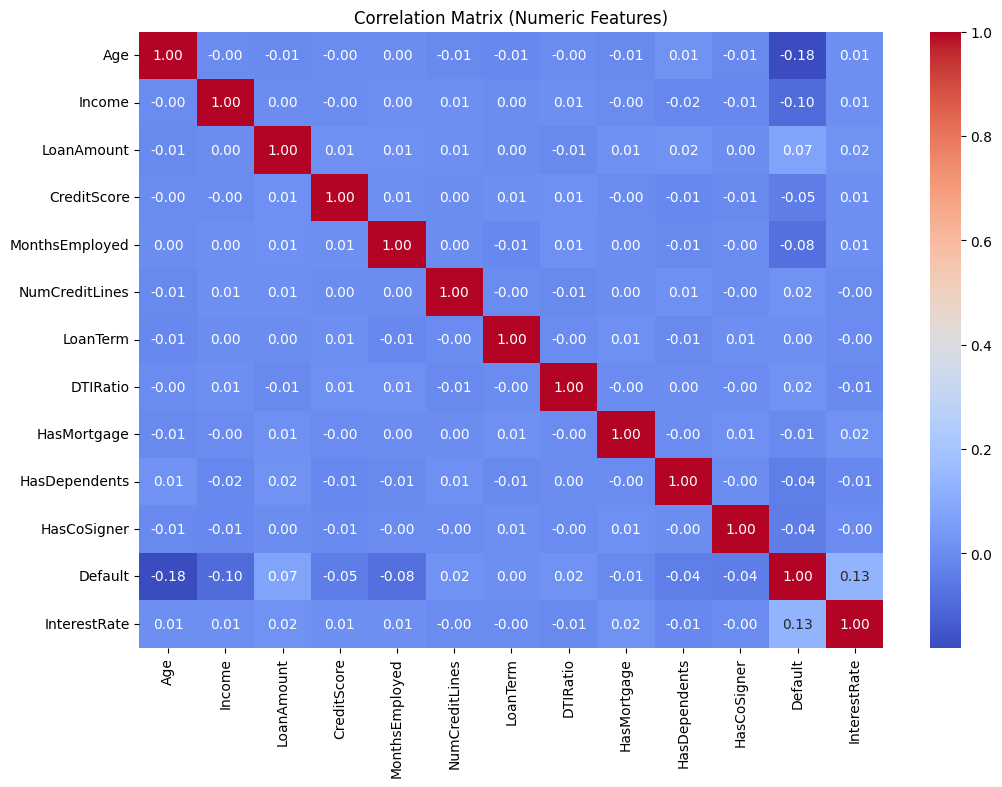

In [16]:
import seaborn as sns

correlation_matrix = dataset.corr(numeric_only=True)

# Show correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()